In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC # "Support vector classifier"

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y1 = np.linspace(ylim[0], ylim[1], 30)
    Y1, X1 = np.meshgrid(y1, x)
    xy = np.vstack([X1.ravel(), Y1.ravel()]).T
    P = model.predict(xy).reshape(X1.shape)
    
    # plot decision boundary and margins
    ax.contour(X1, Y1, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=None)
    
     # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



A função SVC do módulo sklearn divide corretamente um conjunto com 3 classes distintas. Apliquemos esta função a apenas duas dimensões da base de dados iris para efeitos representativos:

(2.0, 6.0)

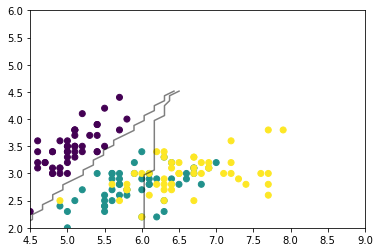

In [2]:
X, y = load_iris(return_X_y = True)
X = X[0:,0:2]
y = y[0:]

model = SVC(kernel='linear', C=1e6)
model.fit(X, y)
plt.scatter(X[:,0],X[:,1],c = y)
plot_svc_decision_function(model, plot_support = True);
plt.xlim(4.5,9)
plt.ylim(2,6)

# 1

Aplicando a toda a base de dados  com 80% de holdout, obtemos:

In [3]:
X, y = load_iris(return_X_y = True)
print(len(X)*0.8)
print(len(y)*0.8)


120.0
120.0


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# arr = np.arange(0,len(X))

# # np.random.shuffle(arr)
# # arr1 = np.copy(arr[:120])
# # arr2 = np.copy(arr[120:])
# # X1 = X[arr1]
# # y1 = y[arr1]

# # X2 = X[arr2]
# # y2 = y[arr2]
X1,X2,y1,y2 = train_test_split(X,y,test_size = 0.2,shuffle = True)


model = SVC(kernel='linear', C=1e6)
model.fit(X1, y1)
y_pred = model.predict(X2)
conf = confusion_matrix(y2,y_pred)
print(conf)

[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


# 2 e 3

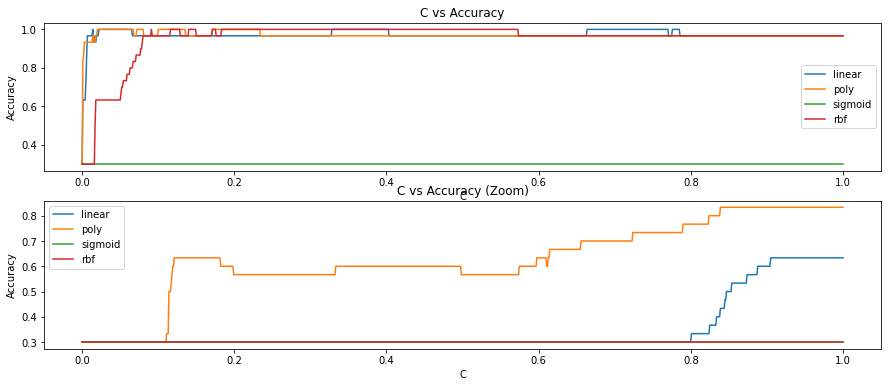

In [25]:
fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (15,6))
X1,X2,y1,y2 = train_test_split(X,y,test_size = 0.2,shuffle = True)

#Ce = 10.**np.arange(-10,1)
Ce = np.linspace(1e-6,1,1000)
final = np.zeros(len(Ce))
ker = ['linear','poly','sigmoid','rbf']
for k in ker:
    i = 0
    for c in Ce:
        model = SVC(kernel=k, C=c)
        model.fit(X1, y1)
        y_pred = model.predict(X2)
        conf = confusion_matrix(y2,y_pred)
        final[i] = np.diag(conf).sum()/np.sum(conf)
        i += 1

    ax[0].plot(Ce,final, label = k)

Ce1 = np.linspace(1e-5,1e-3,1000)
final = np.zeros(len(Ce))
ker = ['linear','poly','sigmoid','rbf']
for k in ker:
    i = 0
    for c in Ce1:
        model = SVC(kernel=k, C=c)
        model.fit(X1, y1)
        y_pred = model.predict(X2)
        conf = confusion_matrix(y2,y_pred)
        final[i] = np.diag(conf).sum()/np.sum(conf)
        i += 1

    ax[1].plot(Ce,final, label = k)
ax[0].set_title('C vs Accuracy')
ax[1].set_title('C vs Accuracy (Zoom)')
ax[0].set_xlabel('C')
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('C')
ax[1].set_ylabel('Accuracy')
ax[0].legend()
ax[1].legend()
plt.show()

# 4 e 5

Podemos por as hipóteses seguintes: para valores de $C = 0.002$, o kernel linear é pior do que o polinomial; Para o kernel sigmoidal, ter $C = 0.2$ ou $C = 0.8$

## Cross validation e t-test


### 1ª hipótese: linear vs poly (C = 0.002)

média de score linear:  0.5333333333333333
média de score polinomial:  0.8733333333333333
valor p =  0.00015889008004108855


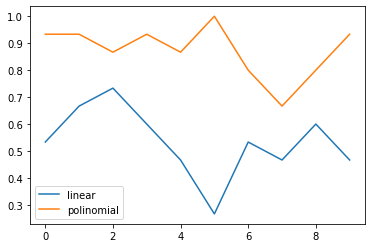

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from scipy import stats

arr = np.arange(len(X))
np.random.shuffle(arr)
X3 = np.copy(X[arr])
y3 = np.copy(y[arr])

model1 = SVC(kernel = 'linear',C = 0.002)
model2 = SVC(kernel = 'poly',C = 0.002)

X31,X32,y31,y32 = train_test_split(X3,y3,test_size = 0.2)

cv1 = ShuffleSplit(n_splits=10)
cv2 = ShuffleSplit(n_splits=10)

scores1 = cross_val_score(model1, X3, y3, cv=cv1)

scores2 = cross_val_score(model2, X3, y3, cv=cv2)

plt.plot(scores1,label = 'linear')
plt.plot(scores2,label = 'polinomial')
plt.legend()

print('média de score linear: ', scores1.mean())
print('média de score polinomial: ', scores2.mean())

statis, p = stats.ttest_rel(scores1, scores2)
print('valor p = ',p)


Dado que  valor $p$ e é muito pequeno, podemos rejeitar a hipótese nula e dizer que para $C = 0.002$ o kernel polinomial apresenta melhores resultados.

### 2ª hipótese: C = 0.2 VS C = 0.8 para sigmoidal

média de score para C = 0.2:  0.2066666666666667
média de score para C = 0.8:  0.16666666666666669
valor p =  0.2788729992489171


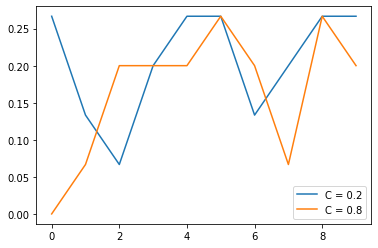

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from scipy import stats

arr = np.arange(len(X))
np.random.shuffle(arr)
X3 = np.copy(X[arr])
y3 = np.copy(y[arr])

model1 = SVC(kernel = 'sigmoid',C = 0.2)
model2 = SVC(kernel = 'sigmoid',C = 0.8)
cv1 = ShuffleSplit(n_splits=10)
cv2 = ShuffleSplit(n_splits=10)

scores1 = cross_val_score(model1, X3, y3, cv=cv1)

scores2 = cross_val_score(model2, X3, y3, cv=cv2)

plt.plot(scores1,label = 'C = 0.2')
plt.plot(scores2,label = 'C = 0.8')
plt.legend()

print('média de score para C = 0.2: ', scores1.mean())
print('média de score para C = 0.8: ', scores2.mean())

statis, p = stats.ttest_rel(scores1, scores2)
print('valor p = ',p)

O valor p é muito alto, de modo a que podemos dizer que para $C = 0.2$ e $C = 0.8$ o kernel sigmoidal dá os mesmos resultados. 